In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
pwd

'/content'

In [6]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
# from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

import plotly.express as px

import os
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# seed_value = 1337
# np.random.seed(seed_value)
# tf.random.set_seed(seed_value)
# rn.seed(seed_value)

In [7]:
data = pd.read_csv('/content/drive/MyDrive/projdata/tripadvisor_hotel_reviews.csv')
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [8]:
data.describe

<bound method NDFrame.describe of                                                   Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]>

In [ ]:
# #correct spelling
# def correct_spell(text):
#   text = TextBlob(text)
#   text = text.correct()
#   return text
# for i in range(2):
#   print(data['Review'][100+i])
#   data['Review'][100+i] = correct_spell(data['Review'][100+i])
#   print(data['Review'][100+i])
# # data["Review"] = pd.Series("auto corrrect this sentance")

# # t.apply(correct_spell)
# # data.head(10)

In [9]:
#analyze the data
plot = px.histogram(data, x="Rating")
plot.update_traces(marker_color="lightblue", marker_line_color="black", marker_line_width=1)
plot.update_layout(title="Rating Counts")
plot.show()

In [10]:
#change to all lower cases for review text
def lower_case(text):
  return text.lower()
# t = pd.Series(['HAHA', 'AAaa', 'HEllo'])
data["Review"] = data["Review"].apply(lower_case)

In [11]:
#remove special characters from review text
# print(data["Review"][20])
def remove_special(text):
  text = re.sub("[^A-Za-z0-9\s]", "", text)
  return text
# t = pd.Series("Hello%^*)123[.,")
data["Review"] = data["Review"].apply(remove_special)
# print(data["Review"][20])

In [12]:
#remove stop words
# print(data["Review"][20])
def remove_stopwords(text):
  stop_words = nltk.corpus.stopwords.words("english")
  word_token = word_tokenize(text)
  text = " ".join(w for w in word_token if not w in stop_words)
  return text
# t = pd.Series("This is the best tool in a while")
data["Review"] = data["Review"].apply(remove_stopwords)
# print(data["Review"][20])

In [13]:
for i in range(10):
  print(data['Review'][i])

nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night
ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite 5 day stay offer correct false a

In [14]:
data.to_csv("/content/drive/MyDrive/projdata/tripadvisor_hotel_reviews_bf_stemming.csv", index = False)

In [15]:
# Stemming
def simple_stemmer(text):
  ps = nltk.porter.PorterStemmer()
  
  #text = ' '.join([ps.stem(word) for word in text.split()])
  words = word_tokenize(text)
  text = ' '.join([ps.stem(word) for word in words])
  return text

# No stemming
print(data["Review"][628])

# Apply stemming
print(simple_stemmer(data["Review"][628]))

#print(nltk.porter.PorterStemmer().stem("seattle"))

inconsistent arrived eliot spending wonderful night lenox eliot closer boston conservatory initially wanted stay room night stayed lenox small charming lobby eliot somewhat chaotic large group checking raining arrived evening doorman greet bellman help bags steps enter hotel steps lobby carrying luggage easythe room nicely decorated clean bathrooms cute window seats charming beds comfortablein room internet access 10 charge think includedturn service offered nightly neighborhood convenient shopping newberry street close berklee boston conservatoryupon checking help lugging bags street hailing cab ourselvesafter arriving home received 1000 fee adjustment luggage tag told taken room assure luggage tag asked fee removed told today remains
inconsist arriv eliot spend wonder night lenox eliot closer boston conservatori initi want stay room night stay lenox small charm lobbi eliot somewhat chaotic larg group check rain arriv even doorman greet bellman help bag step enter hotel step lobbi car

In [16]:
before_lemmatize_data = pd.read_csv("/content/drive/MyDrive/projdata/tripadvisor_hotel_reviews_bf_stemming.csv")

In [17]:
#Lemmatization
def lemmatize_word(text):
  lemmatizer = WordNetLemmatizer()
  word_token = word_tokenize(text)
  text = " ".join(lemmatizer.lemmatize(w) for w in word_token)
  return text
#no lemmatization 
print(data["Review"][618])

# Apply lemmatization
print(lemmatize_word(data["Review"][618]))

# t = pd.Series("girls playing plays played studies caring cares cared")
# data["Review"] = data["Review"].apply(lemmatize_word)
# # data.head(20)

cold location atmosphere nice complimentary shuttle copley place helpful generally convenient suites comfortable spacious hotel dining extremely expensive overnight parking fee extremely expensive hotel boston hotel corridors cold pool frigid literally asked desk nt heated advertised said additionally jacuzzi jets nt working entire days decent hotel price charge need better job
cold location atmosphere nice complimentary shuttle copley place helpful generally convenient suite comfortable spacious hotel dining extremely expensive overnight parking fee extremely expensive hotel boston hotel corridor cold pool frigid literally asked desk nt heated advertised said additionally jacuzzi jet nt working entire day decent hotel price charge need better job


In [18]:
print(lemmatize_word(before_lemmatize_data["Review"][618]))

cold location atmosphere nice complimentary shuttle copley place helpful generally convenient suite comfortable spacious hotel dining extremely expensive overnight parking fee extremely expensive hotel boston hotel corridor cold pool frigid literally asked desk nt heated advertised said additionally jacuzzi jet nt working entire day decent hotel price charge need better job


In [24]:
before_lemmatize_data.to_csv("/content/drive/MyDrive/projdata/tripadvisor_hotel_reviews_after_stemming.csv", index = False)

In [19]:
#most frequent words for rating1
frequent_words1=pd.Series(" ".join(data["Review"][data["Rating"]==1]).split()).value_counts()[:20].index.tolist()

In [20]:
#most frequent words for rating2
frequent_words2=pd.Series(" ".join(data["Review"][data["Rating"]==2]).split()).value_counts()[:20].index.tolist()

In [21]:
#most frequent words for rating3
frequent_words3=pd.Series(" ".join(data["Review"][data["Rating"]==3]).split()).value_counts()[:20].index.tolist()

In [22]:
#most frequent words for rating4
frequent_words4=pd.Series(" ".join(data["Review"][data["Rating"]==4]).split()).value_counts()[:20].index.tolist()

In [23]:
#most frequent words for rating5
frequent_words5=pd.Series(" ".join(data["Review"][data["Rating"]==5]).split()).value_counts()[:20].index.tolist()
print(frequent_words5)

['hotel', 'room', 'great', 'staff', 'stay', 'nt', 'good', 'location', 'stayed', 'rooms', 'nice', 'breakfast', 'service', 'time', 'clean', 'excellent', 'day', 'beach', 'friendly', 'night']


In [ ]:
#find the most common words among all 5 ratings
common_words = set(frequent_words1)&set(frequent_words2)&set(frequent_words3)&set(frequent_words4)&set(frequent_words5)
print(common_words)

{'good', 'service', 'day', 'room', 'stay', 'stayed', 'nt', 'hotel', 'night', 'time', 'staff', 'rooms'}


In [ ]:
# Remove most frequent words?? Not sure if this is required
top5 = [" hotel ", " room ", " hotels ", " rooms ", " nt ", " s "," day ", " time ", " stay ", " night ", " stayed "]
for top in top5:
  for i in range(len(data["Review"])):
    data["Review"][i] = data["Review"][i].replace(top, " ")
print(data["Review"][9])

excellent monaco past delight reception staff friendly professional smart comfortable bed particularly liked reception small dog received staff guests spoke loved mild negative distance uphill ppmarket restaurants 1st overall great experience


In [ ]:
data["Review"][10000]

'recommanded date 1 st december 2006we returned splendid nights thing realy pleasantvery clean place nice staffbreakfast relatively expensive recommand outside hoteltwo little problemes bit far metro station free connection internet'

Text(0.5, 1.0, 'Most common Words in Rating 1')

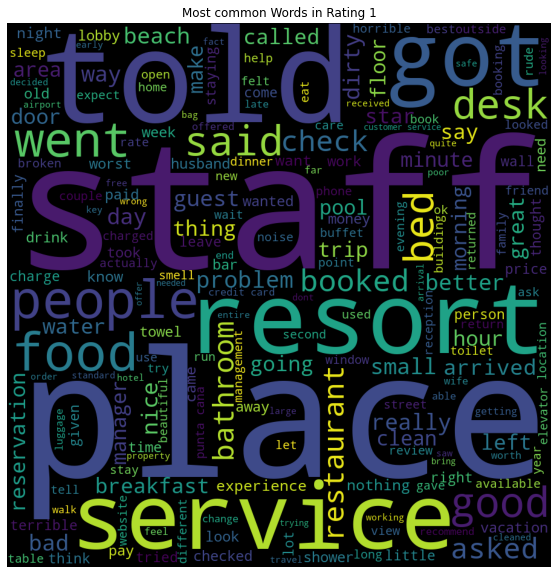

In [ ]:
#visualize the most common words for rating 1
rating1_words = " ".join([text for text in data["Review"][data["Rating"]==1]])
wordcloud = WordCloud(width = 900, height = 900).generate(rating1_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most common Words in Rating 1")

Text(0.5, 1.0, 'Most common Words in Rating 2')

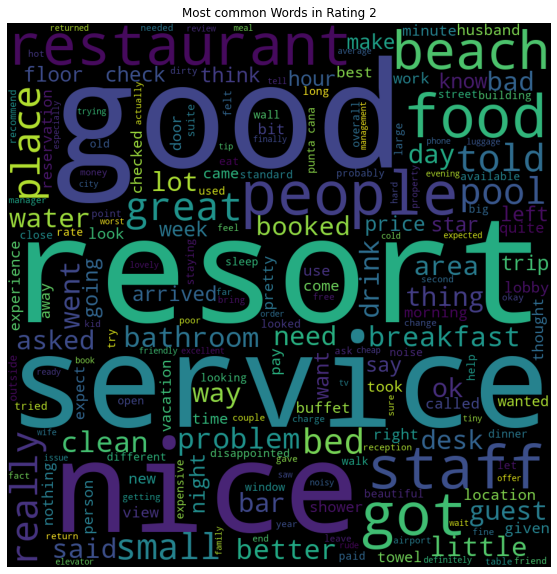

In [ ]:
#visualize the most common words for rating 2
rating1_words = " ".join([text for text in data["Review"][data["Rating"]==2]])
wordcloud = WordCloud(width = 900, height = 900).generate(rating1_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most common Words in Rating 2")

Text(0.5, 1.0, 'Most common Words in Rating 3')

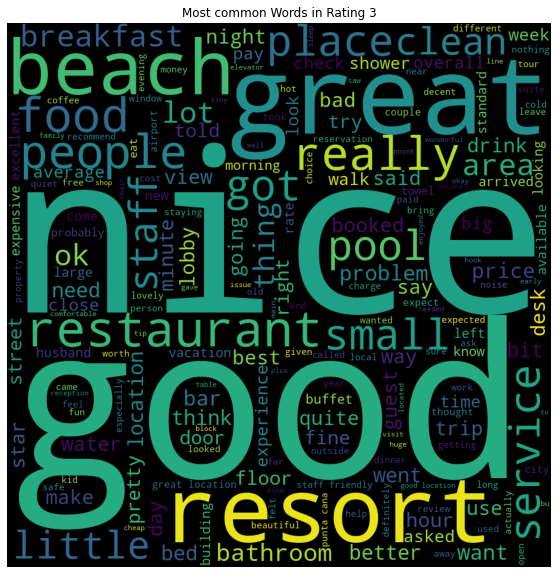

In [ ]:
#visualize the most common words for rating 3
rating1_words = " ".join([text for text in data["Review"][data["Rating"]==3]])
wordcloud = WordCloud(width = 900, height = 900).generate(rating1_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most common Words in Rating 3")

Text(0.5, 1.0, 'Most common Words in Rating 4')

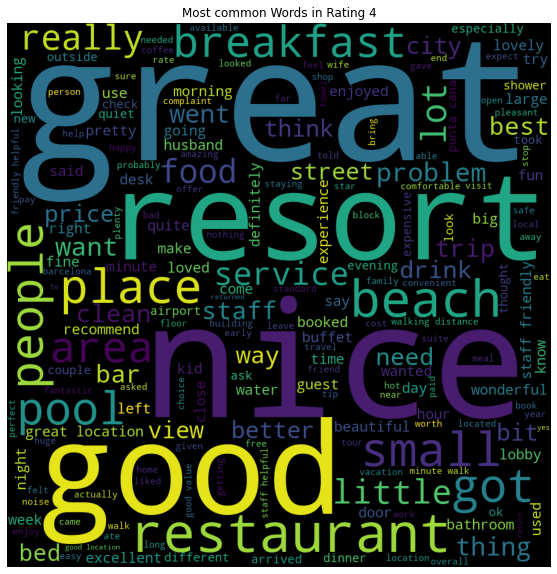

In [ ]:
#visualize the most common words for rating 4
rating1_words = " ".join([text for text in data["Review"][data["Rating"]==4]])
wordcloud = WordCloud(width = 900, height = 900).generate(rating1_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most common Words in Rating 4")

Text(0.5, 1.0, 'Most common Words in Rating 5')

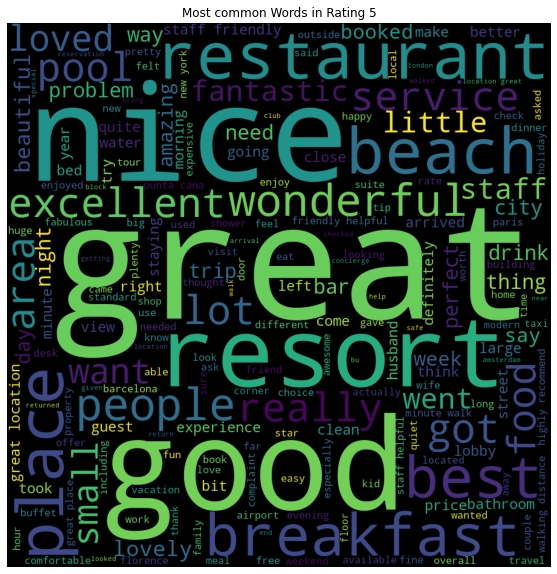

In [ ]:
#visualize the most common words for rating 5
rating1_words = " ".join([text for text in data["Review"][data["Rating"]==5]])
wordcloud = WordCloud(width = 900, height = 900).generate(rating1_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most common Words in Rating 5")

In [ ]:
# Save data_copy into a csv file, so that read the data directly in the future
data.to_csv("/content/drive/MyDrive/projdata/tripadvisor_hotel_reviews_copy.csv", index = False)


In [2]:
# Read data from file for sentimental polarity analysis and overall rating prediction
data_copy = pd.read_csv("/content/drive/MyDrive/projdata/tripadvisor_hotel_reviews_after_stemming.csv")

NameError: ignored

In [26]:
# Valence Aware Dictionary and Sentiment Reasoner (VADER) sentiment analysis
# Reference: https://deepnote.com/@abid/Trip-Advisor-Data-AnalysisML-f6060b39-d76c-4579-9648-a54bc8b5ffb5
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create sentimental polarity
# This function will score a review in scale [-1,1], where "1" means most positive
# "-1" means most negative
sentiment_analyzer = SentimentIntensityAnalyzer()

def compound_score(text):
  return sentiment_analyzer.polarity_scores(text)["compound"]

# Define "postive, negative, neutral" sentiments
def sentiment(score):
  emotion = ""
  if (score >= 0.5):
    emotion = "Positive"
  elif (score <= -0.5):
    emotion = "Negative"
  else:
    emotion = "Neutral"
  return emotion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 


In [1]:
## Create sentiment score
polarity_scores = data_copy["Review"].astype("str").apply(compound_score)
data_copy["Sentiment_Score"] = polarity_scores

data_copy["Sentiment"] = data_copy["Sentiment_Score"].apply(sentiment)


NameError: ignored

100    Positive
101     Neutral
Name: Sentiment, dtype: object
100    0.9753
101    0.3134
Name: Sentiment_Score, dtype: float64
dump weekend expected charming 1929 property based website reviews expedia expect charming mean incompetent staff showers randomly scalding cold medium pressure trickle tacky acoustic ceilings moldy nonfunctional windows shower screens windows ac left unlocked maid service wait 18 hours iron gave 30 minutes make wedding car 8am parking thought desk reality etc etcexpedia apparantly wo publish negative reviews like gather tried 3 times publish online calling customer service exchanging emails beware reviews expedia especially beware like


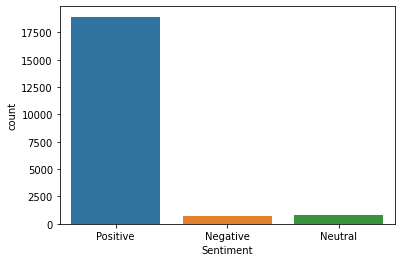

In [ ]:
## Visualize sentiment score
print(data_copy["Sentiment"][100:102])
print(data_copy["Sentiment_Score"][100:102])
print(data_copy["Review"][101])

# plot the count of "positive", "negative", and "neutral"
sns.countplot (data = data_copy, x = "Sentiment", palette = "tab10")

# plot the count of sentiment for each overall rating
viz = data_copy[['Rating', 'Sentiment']].value_counts().rename_axis(['Rating', 'Sentiment']).reset_index(name='counts')
figure = px.bar(x = viz.Rating, y = viz.counts, color = viz.Sentiment, color_discrete_sequence=px.colors.qualitative.Pastel,
                title = "Sentiment for Ratings", labels = {'x': 'Ratings', 'y': 'Total Number'})
figure.show()

In [ ]:
## Overall rating prediction
# Possible models:
# Long Short Term Memory(LSTM):https://deepnote.com/@abid/Trip-Advisor-Data-AnalysisML-f6060b39-d76c-4579-9648-a54bc8b5ffb5
# Support Vector Machine (SVM)
# Ordinal logistic Regression: Coursera Week 11 Video 11.7 Last page
# Categorical Naive Bayes

In [ ]:
data_copy = pd.read_csv("/content/drive/MyDrive/projdata/tripadvisor_hotel_reviews_copy.csv")

In [ ]:
# Subject to memory limitation
N = 5000

# data_copy = data[0:N]
data_copy = data.copy()
print(data_copy["Review"].shape)
#it_train = itoken(train$review, preprocessor = tolower, tokenizer = word_tokenizer)

from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse  import csr_matrix

## establish a document-term matrix
# Parameters require tunning
count_vect = CountVectorizer(ngram_range = (1,4), 
                             max_features = 10000,
                             min_df = 0.001,
                             max_df = 0.5, 
                             analyzer = "word")
X_train_counts = count_vect.fit_transform(data_copy["Review"])

# fit_transform returns one-dimensional array
X_train_counts.shape

# reshape into two-dimensional array
#X_train_counts = X_train_counts.reshape(N, -1)

# MUST convert csr_parse matrix to np.array! 
X_train_counts = X_train_counts.toarray()
print(X_train_counts.shape)

(20491,)
(20491, 10000)


In [ ]:
# combine X_train_counts and label

Y_train = np.array(data_copy["Rating"])
# Y_train = Y_train.reshape(,1)
print(X_train_counts.shape)

print(Y_train.shape)


print(type(X_train_counts))

# when two np.arrays have difference shape, must use np.concatenate(), instead of np.hstack()
#X_train = np.concatenate((X_train_counts, Y_train), axis = 1)
#print(X_train.shape) # should have one more column
#print(X_train[2,-1])



(20491, 10000)
(20491,)
<class 'numpy.ndarray'>


In [ ]:
# Split training and test data
# Split 10% of total dataset as test data
# Split the remain 90% of total dataset into N folds. Use N-1 folds as training and the last 1 fold as test

In [ ]:
# split training and test dataset using sklearn function train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_counts, Y_train, test_size=0.1, random_state=0)

In [ ]:
#xpeng added session:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# Models
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import BernoulliNB

#tfid = TfidfVectorizer()
#train_tfid_matrix = tfid.fit_transform(X_train)
#test_tfid_matrix = tfid.transform(X_test)

#new_models = [DecisionTreeClassifier(),
#              RandomForestClassifier(),
#              SVC(),
#              KNeighborsClassifier(),
#              BernoulliNB()]

#accuracy = []

#for model in new_models:
#    cross_val = cross_val_score(model, train_tfid_matrix, y_train, scoring='accuracy',cv=StratifiedKFold(10)).mean()
#    accuracy.append(cross_val)

#models_name = ['DecisionTreeClassifier', 'RandomForestClassifier', 'SVC',
#        'KNeighborsClassifier', 'BernoulliNB']

#acc = pd.DataFrame({'Model': models_name, 'Accuracy': accuracy})
#acc

The mean accuracy on the test set is:  0.5824390243902439
Below is confusion matrix. Entry at (i,j) denotes that the true value is i, but predicted as j.
Number on diagonal are the ones correctly predicted.


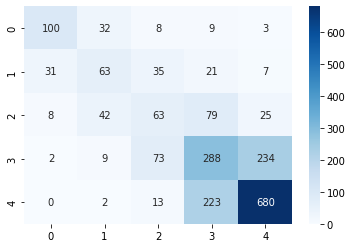

In [ ]:
from sklearn.linear_model import LogisticRegression
# perform training
#lg = LogisticRegression(multi_class='ovr')
#lg = LogisticRegression(multi_class='multinomial')
lg = LogisticRegression(multi_class='auto')

lg_model = lg.fit(X_train, y_train)

# perform prediction
y_pred = lg_model.predict(X_test)



## evaluate prediction results
# return the mean accuracy 
print("The mean accuracy on the test set is: ",lg_model.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
print("Below is confusion matrix. Entry at (i,j) denotes that the true value is i, but predicted as j.")
print("Number on diagonal are the ones correctly predicted.")

sns.color_palette("Blues", as_cmap=True)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap="Blues", fmt='g')
plt.show()



# 2-star is the most difficult to predict, followed by 3-star and 4-star


In [ ]:
coefficients = pd.DataFrame(lg.coef_)
coefficients.to_csv("lg_coefficients.csv", index = True)

ngrams = pd.DataFrame(count_vect.get_feature_names_out())
ngrams.to_csv("lg_ngrams.csv", index= True)

In [ ]:
# Try different lambda (regularization coefficient)


#lambda_set = [0.001, 0.01, 0.1, 1, 10, 100]
#lambda_set = [0.0001]
#for lambda_temp in lambda_set:
#  lg = LogisticRegression(multi_class='auto', C = 1/lambda_temp)
#  lg_model = lg.fit(X_train, y_train)

#  # perform prediction
#  y_pred = lg_model.predict(X_test)

#  print(confusion_matrix(y_test, y_pred))


In [ ]:
# Let's change the rating to be more general and easier to understand
def rating(score):
    if score > 3:
        return 'Good'
    elif score == 3:
        return 'Netral'
    else:
        return 'Bad'

In [ ]:
df = data_copy.copy()
df['Rating'] = df['Rating'].apply(rating)
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Rating'], test_size=0.2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_copy['Review'], data_copy['Rating'], test_size=0.2)

In [ ]:
import pickle
from tensorflow.keras.regularizers import l1, l2

In [ ]:
#Tokenize the data
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(data["Review"].values)
# X=tokenizer.texts_to_sequences(data["Review"].values)
# X=pad_sequences(X, padding='post', maxlen=350)

# encoding = {1: 0,
#             2: 1,
#             3: 2,
#             4: 3,
#             5: 4
#            }

# labels = ['1', '2', '3', '4', '5']
           
# y = data['Rating'].copy()
# y.replace(encoding, inplace=True)

# #parameters for LSTM
# vocab_size = 49536
# print(vocab_size)
# embedding_dim = 16
# num_epochs=3
# batch_size=100
# units = 76

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)
# print(tokenizer.word_index)
total_word = len(tokenizer.word_index)
print('Total distinct words: {}'.format(total_word))

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq)

# One hot encoding the label
lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)


Total distinct words: 69907


In [ ]:
pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))
pickle.dump(lb, open('label.pkl', 'wb'))

In [ ]:
model3 = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_word, 8),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.001),
                                                          bias_regularizer=l2(0.001), activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           559256    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               3200      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                        

In [ ]:
#model3.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

#model3.fit(train_padded, train_labels, epochs=3, validation_data=(test_padded, test_labels))

In [ ]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_word, 8),
                                    tf.keras.layers.LSTM(16),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 8)           559256    
                                                                 
 lstm_1 (LSTM)               (None, 16)                1600      
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 560,907
Trainable params: 560,907
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model1.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

#model1.fit(train_padded, train_labels, epochs=3, validation_data=(test_padded, test_labels))

In [ ]:
model2 = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_word, 8),
                                    tf.keras.layers.LSTM(16),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 8)           559256    
                                                                 
 lstm_2 (LSTM)               (None, 16)                1600      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 560,907
Trainable params: 560,907
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

#model2.fit(train_padded, train_labels, epochs=3, validation_data=(test_padded, test_labels))

In [ ]:
pred2 = model3.predict(test_padded)
true_labels = np.argmax(test_labels, axis=-1)
pred_labels = np.argmax(pred2, axis=-1)
print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))

129/129 [==============================] - 22s 165ms/step
[[143 137   0   0   0]
 [191 162   0   0   0]
 [254 186   0   0   0]
 [723 491   1   0   0]
 [992 818   1   0   0]]
              precision    recall  f1-score   support

           0       0.06      0.51      0.11       280
           1       0.09      0.46      0.15       353
           2       0.00      0.00      0.00       440
           3       0.00      0.00      0.00      1215
           4       0.00      0.00      0.00      1811

    accuracy                           0.07      4099
   macro avg       0.03      0.19      0.05      4099
weighted avg       0.01      0.07      0.02      4099



In [ ]:
pred2 = model1.predict(test_padded)
true_labels = np.argmax(test_labels, axis=-1)
pred_labels = np.argmax(pred2, axis=-1)
print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))

129/129 [==============================] - 14s 105ms/step
[[104  75 101   0   0]
 [125  98 130   0   0]
 [163 130 147   0   0]
 [532 272 411   0   0]
 [738 437 636   0   0]]
              precision    recall  f1-score   support

           0       0.06      0.37      0.11       280
           1       0.10      0.28      0.14       353
           2       0.10      0.33      0.16       440
           3       0.00      0.00      0.00      1215
           4       0.00      0.00      0.00      1811

    accuracy                           0.09      4099
   macro avg       0.05      0.20      0.08      4099
weighted avg       0.02      0.09      0.04      4099



In [ ]:
pred2 = model2.predict(test_padded)
true_labels = np.argmax(test_labels, axis=-1)
pred_labels = np.argmax(pred2, axis=-1)
print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))

129/129 [==============================] - 17s 110ms/step
[[ 91  66 123   0   0]
 [127  88 138   0   0]
 [141 126 173   0   0]
 [434 356 425   0   0]
 [571 520 720   0   0]]
              precision    recall  f1-score   support

           0       0.07      0.33      0.11       280
           1       0.08      0.25      0.12       353
           2       0.11      0.39      0.17       440
           3       0.00      0.00      0.00      1215
           4       0.00      0.00      0.00      1811

    accuracy                           0.09      4099
   macro avg       0.05      0.19      0.08      4099
weighted avg       0.02      0.09      0.04      4099

